In [1]:
import numpy as np

# Simulate 1000 tosses of two fair coins
outcomes = np.random.choice(['HH', 'HT', 'TH', 'TT'], size=1000)

# Estimate P(both heads)
prob_both_heads = np.sum(outcomes == 'HH') / len(outcomes)
print("Empirical P(HH):", prob_both_heads)

# Estimate P(at least one tail)
prob_at_least_one_tail = np.sum((outcomes == 'HT') | (outcomes == 'TH') | (outcomes == 'TT')) / len(outcomes)
print("Empirical P(at least one tail):", prob_at_least_one_tail)

# Compare empirical vs theoretical results
# Theoretical probabilities: P(HH) = 1/4, P(at least one tail) = 3/4
theoretical_prob_both_heads = 1/4
theoretical_prob_at_least_one_tail = 3/4

print("\nTheoretical P(HH):", theoretical_prob_both_heads)
print("Theoretical P(at least one tail):", theoretical_prob_at_least_one_tail)

print("\nComparison:")
print(f"Difference in P(HH): {abs(prob_both_heads - theoretical_prob_both_heads):.4f}")
print(f"Difference in P(at least one tail): {abs(prob_at_least_one_tail - theoretical_prob_at_least_one_tail):.4f}")

Empirical P(HH): 0.264
Empirical P(at least one tail): 0.736

Theoretical P(HH): 0.25
Theoretical P(at least one tail): 0.75

Comparison:
Difference in P(HH): 0.0140
Difference in P(at least one tail): 0.0140


# Task
Analyze a dataset using pandas to calculate the probability that a person is diabetic given high blood pressure and the probability that a person is diabetic. Use conditional and marginal probabilities.

## Load data

### Subtask:
Load the dataset into a pandas DataFrame.


**Reasoning**:
Import pandas and load the dataset into a DataFrame.



In [5]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Inspection

Inspect the data to understand its structure and identify the relevant columns for 'diabetes' and 'high blood pressure'.

In [7]:
# Display column names and data types
print(df.info())

# Display the first few rows to understand the data
display(df.head())

# Check for unique values or value counts in relevant columns (like 'Outcome' for diabetes)
print("\nValue counts for 'Outcome' column:")
print(df['Outcome'].value_counts())

# Check for value counts or distribution in 'BloodPressure' column
print("\nDescriptive statistics for 'BloodPressure' column:")
display(df['BloodPressure'].describe())

''' Consider a threshold for high blood pressure for the analysis. A common threshold for
 high blood pressure is 90 mmHg (diastolic) or 140 mmHg (systolic). Let's use a threshold of 90
 for diastolic pressure as an example for 'high blood pressure'. We can create a new column to
  indicate high blood pressure.'''
df['HighBloodPressure'] = df['BloodPressure'] > 90

# Display the first few rows with the new column
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Value counts for 'Outcome' column:
Outcome
0    500
1    268
Name: count, dtype: int64

Descriptive statistics for 'BloodPressure' column:


,BloodPressure
count,768.000000
mean,69.105469
std,19.355807
min,0.000000
25%,62.000000
50%,72.000000
75%,80.000000
max,122.000000


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HighBloodPressure
0,6,148,72,35,0,33.6,0.627,50,1,False
1,1,85,66,29,0,26.6,0.351,31,0,False
2,8,183,64,0,0,23.3,0.672,32,1,False
3,1,89,66,23,94,28.1,0.167,21,0,False
4,0,137,40,35,168,43.1,2.288,33,1,False


### Probability Calculations

Now, let's calculate the marginal probability of being diabetic and the conditional probability of being diabetic given high blood pressure.

In [8]:
# Calculate the marginal probability of a person being diabetic
# This is the number of people with Outcome == 1 divided by the total number of people
total_people = len(df)
diabetic_people = df['Outcome'].sum()
marginal_prob_diabetic = diabetic_people / total_people

print(f"Marginal Probability of being diabetic: {marginal_prob_diabetic:.4f}")

# Calculate the conditional probability that a person is diabetic given high blood pressure
# This is the number of people with HighBloodPressure == True AND Outcome == 1 divided by the number of people with HighBloodPressure == True

high_blood_pressure_and_diabetic = df[(df['HighBloodPressure'] == True) & (df['Outcome'] == 1)].shape[0]
high_blood_pressure_people = df[df['HighBloodPressure'] == True].shape[0]

# Avoid division by zero if there are no people with high blood pressure
if high_blood_pressure_people > 0:
    conditional_prob_diabetic_given_high_bp = high_blood_pressure_and_diabetic / high_blood_pressure_people
    print(f"Conditional Probability of being diabetic given high blood pressure: {conditional_prob_diabetic_given_high_bp:.4f}")
else:
    print("There are no individuals with high blood pressure in the dataset to calculate the conditional probability.")

Marginal Probability of being diabetic: 0.3490
Conditional Probability of being diabetic given high blood pressure: 0.4737


# Task
Analyze the provided list of scores: scores = [55, 58, 61, 65, 67, 68, 69, 70, 72, 74, 75, 76, 77, 78, 80, 82, 84, 88, 90, 100]. Create a histogram with bins of size 10 (50-59, 60-69, etc.), determine the skewness of the data, and detect outliers using the IQR method (Lower bound = Q1 - 1.5 * IQR, Upper bound = Q3 + 1.5 * IQR).

## Create dataframe

### Subtask:
Create a pandas DataFrame from the provided scores.


**Reasoning**:
Create a pandas DataFrame from the provided scores.



In [9]:
scores = [55, 58, 61, 65, 67, 68, 69, 70, 72, 74, 75, 76, 77, 78, 80, 82, 84, 88, 90, 100]
df_scores = pd.DataFrame(scores, columns=['Scores'])
display(df_scores.head())

,Scores
0,55
1,58
2,61
3,65
4,67


## Histogram

### Subtask:
Generate a histogram of the scores using the specified bin intervals.


**Reasoning**:
Generate a histogram of the scores using the specified bin intervals.



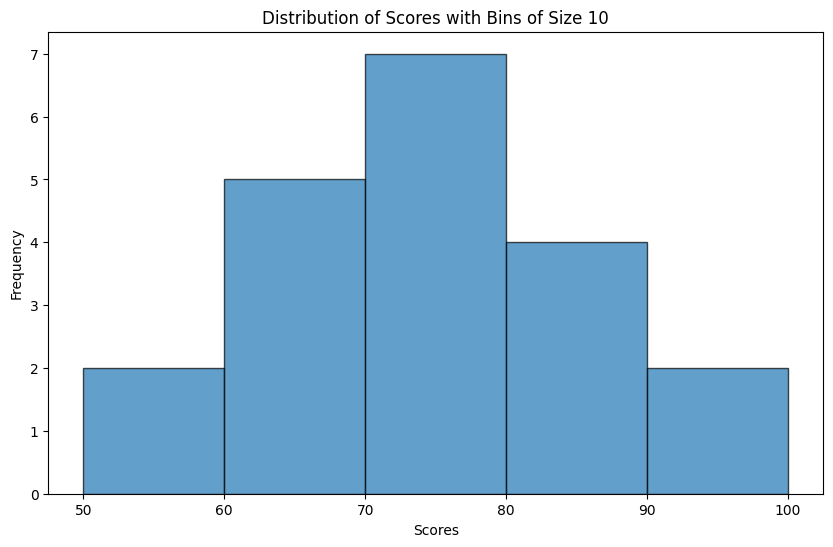

In [10]:
import matplotlib.pyplot as plt

# Create the bin edges for the histogram
bin_edges = range(50, 110, 10)

# Generate the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_scores['Scores'], bins=bin_edges, edgecolor='black', alpha=0.7)

# Add title and labels
plt.title('Distribution of Scores with Bins of Size 10')
plt.xlabel('Scores')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

## Calculate skewness

### Subtask:
Calculate the skewness of the score distribution.


**Reasoning**:
Calculate the skewness of the 'Scores' column in the `df_scores` DataFrame and print the result.



In [11]:
# Calculate the skewness of the 'Scores' column
skewness = df_scores['Scores'].skew()

# Print the calculated skewness value
print(f"Skewness of the score distribution: {skewness:.4f}")

Skewness of the score distribution: 0.3582


## Detect outliers

### Subtask:
Calculate Q1, Q3, IQR, and the lower/upper bounds to identify outliers.


**Reasoning**:
Calculate Q1, Q3, IQR, lower bound, and upper bound for outlier detection using the 'Scores' column of the df_scores DataFrame and print the results.



In [12]:
# Calculate Q1 (25th percentile)
q1 = df_scores['Scores'].quantile(0.25)

# Calculate Q3 (75th percentile)
q3 = df_scores['Scores'].quantile(0.75)

# Calculate IQR (Interquartile Range)
iqr = q3 - q1

# Calculate the lower bound for outlier detection
lower_bound = q1 - 1.5 * iqr

# Calculate the upper bound for outlier detection
upper_bound = q3 + 1.5 * iqr

# Print the results
print(f"Q1 (25th percentile): {q1:.2f}")
print(f"Q3 (75th percentile): {q3:.2f}")
print(f"IQR (Interquartile Range): {iqr:.2f}")
print(f"Lower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")

Q1 (25th percentile): 67.75
Q3 (75th percentile): 80.50
IQR (Interquartile Range): 12.75
Lower bound for outliers: 48.62
Upper bound for outliers: 99.62


## Present results

### Subtask:
Display the histogram, skewness value, and any detected outliers.


**Reasoning**:
Re-display the histogram, print the skewness value, and identify and print any outliers based on the calculated bounds.



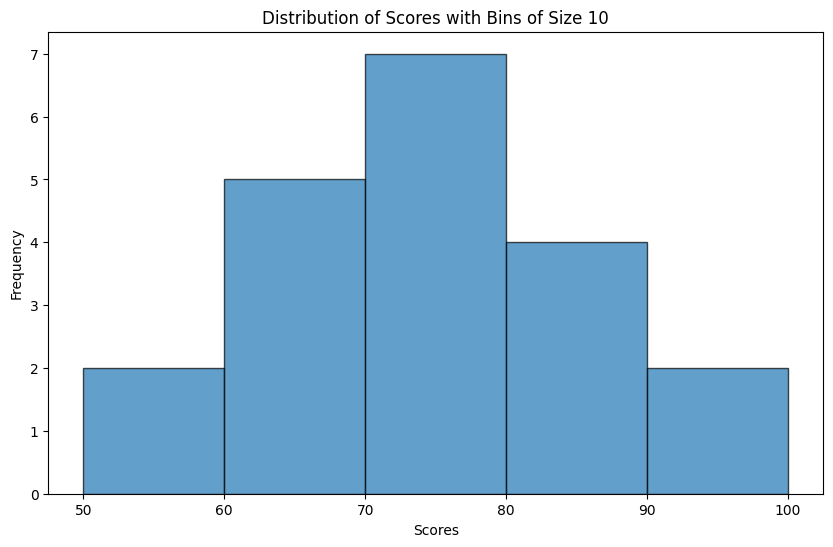

Skewness of the score distribution: 0.3582

Detected outliers:


,Scores
19,100


In [13]:
import matplotlib.pyplot as plt

# Create the bin edges for the histogram
bin_edges = range(50, 110, 10)

# Generate the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_scores['Scores'], bins=bin_edges, edgecolor='black', alpha=0.7)

# Add title and labels
plt.title('Distribution of Scores with Bins of Size 10')
plt.xlabel('Scores')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

# Print the previously calculated skewness value
print(f"Skewness of the score distribution: {skewness:.4f}")

# Identify and print any scores that fall below the lower bound or above the upper bound
outliers = df_scores[(df_scores['Scores'] < lower_bound) | (df_scores['Scores'] > upper_bound)]

if not outliers.empty:
    print("\nDetected outliers:")
    display(outliers)
else:
    print("\nNo outliers detected based on the IQR method.")

## Summary:

### Data Analysis Key Findings

*   The skewness of the score distribution is approximately 0.3582, indicating a slight positive skew.
*   Based on the IQR method with a lower bound of 48.62 and an upper bound of 99.62, one outlier was detected: a score of 100.

### Insights or Next Steps

*   The slight positive skew suggests that the distribution has a longer tail towards higher scores.
*   Investigate the outlier score of 100 to understand if it represents a genuine data point or a potential error.
